In [2]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice  
from operator import attrgetter
from decimal import *
from scipy.stats import binom
import scipy
import itertools
import inspect

## Huffman coding

In [15]:
class node:
    
    def __init__(self, value, letter):
        self.value = value
        self.left = None
        self.right = None
        self.letter = letter
        self.code = None
        
class binary_tree:
    def __init__(self):
        self.root = None
        
         
    def make_code_map(self, symbol):
        code_map = dict()
        self.walk_tree(symbol, code_map, '')
        return code_map

    def walk_tree(self, symbol, code_map, code_prefix):
        if symbol.left == None and symbol.right == None:
            code_map[symbol.letter] = code_prefix
                
        else:
            self.walk_tree(symbol.left, code_map, code_prefix + "0")
            self.walk_tree(symbol.right, code_map, code_prefix + "1")

    def huffman_code(self, symbol): # symbol is a list of objects
        if len(symbol) > 1:
        
            for s in symbol:
                left_child = min(symbol, key=attrgetter('value'))
                
                if len(s.letter) > 1 and s.value == left_child.value:
                    left_child = s

            symbol.remove(left_child)
            
            for s in symbol:
                right_child = min(symbol, key=attrgetter('value'))
                
                if len(s.letter) > 1 and s.value == right_child.value:
                    right_child = s
            
            symbol.remove(right_child)
            
            if len(left_child.letter) < len(right_child.letter):                
                merge_letter = right_child.letter + left_child.letter
                left = left_child
                left_child = right_child
                right_child = left
                
            else:            
                merge_letter = left_child.letter + right_child.letter
            
            merge_value = left_child.value + right_child.value
            merge_node = self.nodes(merge_letter, merge_value)
            merge_node.left = left_child
            merge_node.right = right_child
            symbol.append(merge_node)
        
            self.huffman_code(symbol)
            
        code = self.make_code_map(symbol[0])
        
        return code

    def nodes(self, letter, value):
        self.root = node(value, letter)
        return self.root    
    
            
    def tuples_to_objects(self, symbol): # converts a list of tuples into a list of objects
        l = [self.nodes(s[0], s[1]) for s in symbol]
        return l

    def print_tree(self):
        if self.root!=None:
            self._print_tree(self.root)
            
    def _print_tree(self, cur_node):
        if cur_node != None:
            self._print_tree(cur_node.left)
            print(cur_node.value)
            self._print_tree(cur_node.right)
            


symbols = [
    (0.0575, 'a'), (0.0128, 'b'), (0.0263, 'c'), (0.0285, 'd'),
    (0.0913, 'e'),(0.0173, 'f'), (0.0133, 'g'), (0.0313, 'h'),
    (0.0599, 'i'), (0.0006, 'j'), (0.0084, 'k'), (0.0335, 'l'),
    (0.0235, 'm'), (0.0596, 'n'), (0.0689, 'o'), (0.0192, 'p'), 
    (0.0008, 'q'), (0.0508, 'r'), (0.0567, 's'), (0.0706, 't'), 
    (0.0334, 'u'), (0.0069, 'v'), (0.0119, 'w'), (0.0073, 'x'),
    (0.0164, 'y'), (0.0007, 'z'), (0.1928, ' ')]


# test = [('a', 0.1), ('b', 0.1), ('c', 0.2), ('d', 0.2), ('e', 0.4)]

if isinstance(symbols[0][0], float):
    symbols2 = [x[::-1] for x in symbols]

tree = binary_tree()
t = tree.tuples_to_objects(symbols2)
code = tree.huffman_code(t)
sort_code = {k: v for k, v in sorted(code.items(), key=lambda item: len(item[1]))}
print(sort_code, '\n')

# encoding example
word = ("The idea of a separate identity for Spanish America has been developed in the modern historical literature " 
        "but the idea of complete Spanish American independence from the Spanish Empire was not general at the time " 
         "and political independence was not inevitable Historian Brian Hamnett argues that had the Spanish monarchy "
        "and Spanish liberals been more flexible regarding the place of the overseas possessions that the empire would " 
        "not have collapsed Juntas emerged in Spanish America as Spain faced a political crisis due to the invasion by " 
        "Napoleon Bonaparte and abdication of Ferdinand eightg Spanish Americans reacted in much the same way the Peninsular "
        "Spanish did legitimizing their actions through traditional law which held that sovereignty reverted to the people"
        "in the absence of a legitimate king")

encode = ""
word = word.lower() #since 

for let in word:
    encode = encode + sort_code[let]

print('ENCODED MESSAGE:', encode, '\n')

# decoding example
decode = ""
lett = list(sort_code.keys())
bit = [elem for elem in sort_code.values()]
d = []
for b in encode:
    decode = decode + str(b)
    
    if decode in bit:
        i = bit.index(decode)
        d.append(lett[i])
        decode = ""
    
print('DECODED MESSAGE:', ''.join(d))

# calculate the entropy and the average coding lenght and plot them (is humming code doing a good job?)
def get_probs(p):
    pr = [x for x,y in p]
    probs = np.array(pr)
    return probs/100

def get_code(c):
    c = []

def entropy(probs):
    logs = -1 * (np.log2(probs))
    entro = probs @ logs
    
    return entro

def code_length(probs, c):
    b = [len(elem) for elem in c.values()]
    bit = np.array(b)
    length = probs @ bit
    
    return length


g = get_probs(symbols)
e = entropy(g)
c_l = code_length(g, sort_code)


def graph(y, x_label, y_label, tittle, z):
    # bar char
    x = [1, 2]
    width = 0.8

    fig, ax = plt.subplots()
    rects1 = ax.bar(x, y, width, color='cornflowerblue')

    ax.set_title(tittle)
    
    ax.set_xticks(np.add(x,(0))) # set the position of the x ticks
    ax.set_xticklabels(x_label)
    ax.set_ylim(0,y[1] + 1)
    ax.set_ylabel(y_label)
    plt.yticks(np.arange(0, z[0], z[1]))
    

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = str(round(rect.get_height(), 3))
            h = float(height)
            ax.text(rect.get_x() + rect.get_width()/2., h + 0.2,
                    '{} bits'.format(h),
                    ha='center', va='bottom')

    autolabel(rects1)
    


{' ': '11', 'e': '0001', 't': '0011', 'o': '0101', 'i': '0111', 's': '1001', 'a': '1010', 'n': '1011', 'r': '00001', 'l': '00101', 'u': '01001', 'd': '01100', 'h': '01101', 'c': '10001', 'm': '000001', 'f': '001000', 'p': '001001', 'y': '010001', 'b': '100000', 'g': '100001', 'w': '0000001', 'x': '0100000', 'k': '0100001', 'v': '00000001', 'q': '000000001', 'j': '0000000000', 'z': '0000000001'} 

ENCODED MESSAGE: 0011011010001110111011000001101011010100100011101011100100010010011010000011010001100011101110110000011011001101110011010001110010000101000011110010010011010101101111001011011110100000010001000010111100011010110110110101001111000000001000110111101100000100000001000100101010100100100010110011011110111100110110100011100000101010110000010000110111101101011110010011010100001011110001101000101110010101110011000100001101000110100100001000110000001001001111001101101000111011101100000110101101010010001110001010100000100100100101000100110001111001001001101010110111100101101111010000001

## Excercise 5.21

Humman coding, entropy and average length given: A = {0, 1}; P = {0.9, 0.1} and X2, X3, X4.

Difference between L(C,X) and H(X): 0.3520088128214378
Difference between L(C,X) and H(X): 0.19101321923215653
Difference between L(C,X) and H(X): 0.09421762564287528
Difference between L(C,X) and H(X): 0.058098811090662617
Difference between L(C,X) and H(X): 0.04099762218132552
Difference between L(C,X) and H(X): 0.08602292681724766
Difference between L(C,X) and H(X): 0.5310044064107188


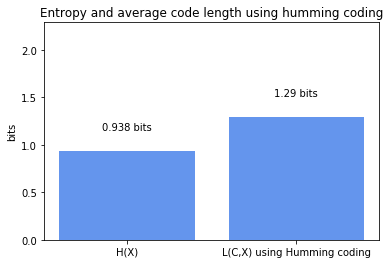

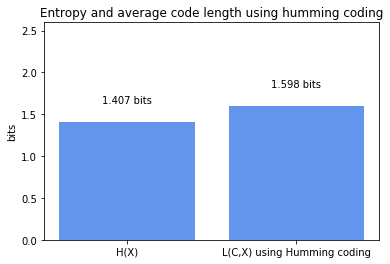

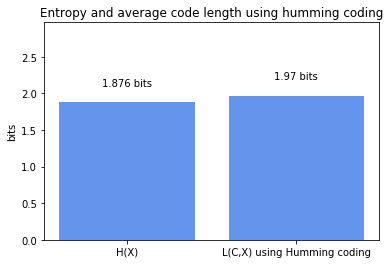

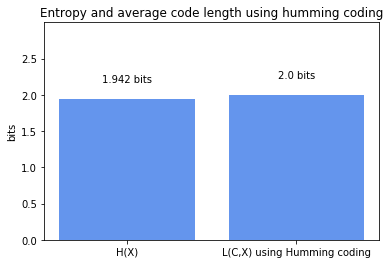

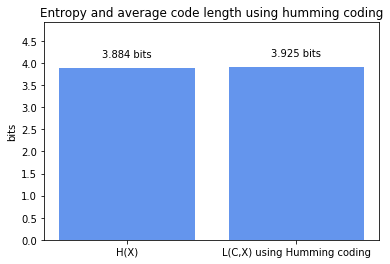

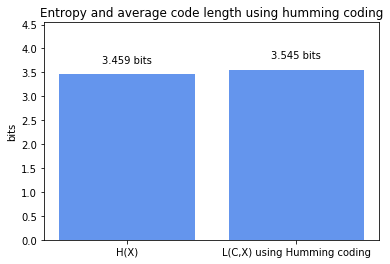

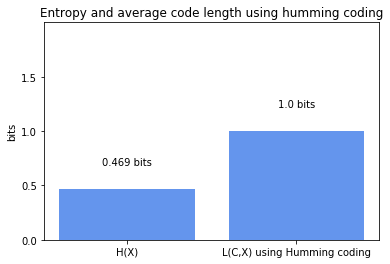

In [10]:
def get_probs_letters(n, p):
    distr = []
    l = list(itertools.product([0, 1], repeat=n))
    for x in l:
        z = x.count(0)
        o = x.count(1)
        pr = p[0]**z*p[1]**o
        distr.append((x, pr))
    return distr

x2 = get_probs_letters(2, (0.9, 0.1))
x3 = get_probs_letters(3, (0.9, 0.1))
x4 = get_probs_letters(4, (0.9, 0.1))
x2_2 = get_probs_letters(2, (0.6, 0.4))
x4_2 = get_probs_letters(4, (0.6, 0.4))
low_entro = get_probs_letters(1, (0.1, 0.9))

e = [('a', 1/11), ('b', 1/11), ('c', 1/11), ('d', 1/11), ('e', 1/11), ('f', 1/11), ('g', 1/11), ('h', 1/11), ('i', 1/11), ('j', 1/11), ('k', 1/11)]
arr = [x2, x3, x4, x2_2, x4_2, e, low_entro]

def results(arr):
    for a in arr:
        obj = binary_tree()
        t = obj.tuples_to_objects(a)
        code = obj.huffman_code(t)
        sort_code = {k: v for k, v in sorted(code.items(), key=lambda item: len(item[1]))}

        pr = [y for z,y in a]
        pr.sort(reverse=True)
        probs = np.array(pr)
        e = entropy(probs)
        c_l = code_length(probs, sort_code)
        y = [e, c_l]
        z = [y[1] + 1, 0.5]
        
        graph(y, ('H(X)', 'L(C,X) using Humming coding'), 'bits', 'Entropy and average code length using humming coding', z)
        print('Difference between L(C,X) and H(X):',  c_l - e)
        
r = results(arr)

## 20 questions game: optimal vs. non-optimal approach

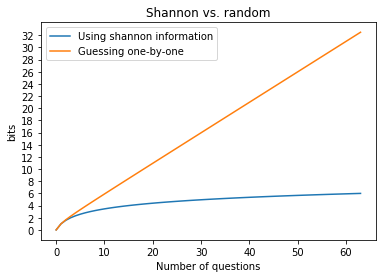

In [4]:
def questions(n):
    p = []
    q = []
    for x in range(1, n + 1):
        nr_quest_shannon = np.log2(x)
        p.append(nr_quest_shannon)
        nr_quest = 1/x * (scipy.special.binom(x - 1, 2) + (2 * (x - 1)))
        q.append(nr_quest)

    fig, ax = plt.subplots()
    plt.plot(np.arange(0, len(p), 1), p)
    plt.plot(np.arange(0, len(q), 1), q)
    plt.legend(["Using shannon information", "Guessing one-by-one"])
    ax.set_title('Shannon vs. random')
    ax.set_xlabel('Number of questions')
    ax.set_ylabel('bits')
    plt.yticks(np.arange(0, q[-1], 2))

questions(64)

In [112]:
l = ['a', 'ba', 'cac', 'b']

for s in l:
    if len(s) > 1:
        print(s)

ba
cac
